In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import torch.optim as optim
from torch import nn
import torch
from torch.utils.data import Dataset, DataLoader, Subset
from src.train import ProcessedDataDataset, Model, Model2, Trainer, train_val_test_split_indices, evaluate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
data_raw, mean, std = pkl.load(open('datasets/processed/processed_dataset.pkl', 'rb'))

In [4]:
# Instantiate the dataset
dataset = ProcessedDataDataset(data_raw)

train_indices, val_indices, test_indices = train_val_test_split_indices(range(len(dataset)),train_size=0.7, val_size=0.15, test_size=0.15, random_seed=42)

train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

# DataLoaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [5]:
model = Model(mean=mean, std=std)
model2 = Model2(mean=mean, std=std)
criterion = nn.MSELoss()  # Assuming regression task
optimizer = optim.Adam(model.parameters(), lr=0.0001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

In [6]:
trainer = Trainer(model, "descriptor", train_loader, val_loader, criterion, optimizer, device='cuda' if torch.cuda.is_available() else 'cpu')
loss_bin = trainer.train(num_epochs=500)

trainer_2 = Trainer(model2, 'descriptor_2', train_loader, val_loader, criterion, optimizer2, device='cuda' if torch.cuda.is_available() else 'cpu')
loss_bin_2 = trainer_2.train(num_epochs=500)

Epoch [1/500], Loss: 0.3072
val Loss after Epoch [1/500]: 0.2789
Epoch [2/500], Loss: 0.3034
val Loss after Epoch [2/500]: 0.2731
Epoch [3/500], Loss: 0.2842
val Loss after Epoch [3/500]: 0.2520
Epoch [4/500], Loss: 0.2569
val Loss after Epoch [4/500]: 0.2363
Epoch [5/500], Loss: 0.2442
val Loss after Epoch [5/500]: 0.2304
Epoch [6/500], Loss: 0.2363
val Loss after Epoch [6/500]: 0.2233
Epoch [7/500], Loss: 0.2243
val Loss after Epoch [7/500]: 0.2114
Epoch [8/500], Loss: 0.2084
val Loss after Epoch [8/500]: 0.1935
Epoch [9/500], Loss: 0.1966
val Loss after Epoch [9/500]: 0.1866
Epoch [10/500], Loss: 0.1794
val Loss after Epoch [10/500]: 0.1686
Epoch [11/500], Loss: 0.1680
val Loss after Epoch [11/500]: 0.1651
Epoch [12/500], Loss: 0.1601
val Loss after Epoch [12/500]: 0.1524
Epoch [13/500], Loss: 0.1535
val Loss after Epoch [13/500]: 0.1480
Epoch [14/500], Loss: 0.1495
val Loss after Epoch [14/500]: 0.1421
Epoch [15/500], Loss: 0.1450
val Loss after Epoch [15/500]: 0.1373
Epoch [16/500

In [13]:
torch.save(model, 'models/model.pt')
torch.save(model2, 'models/model2.pt')

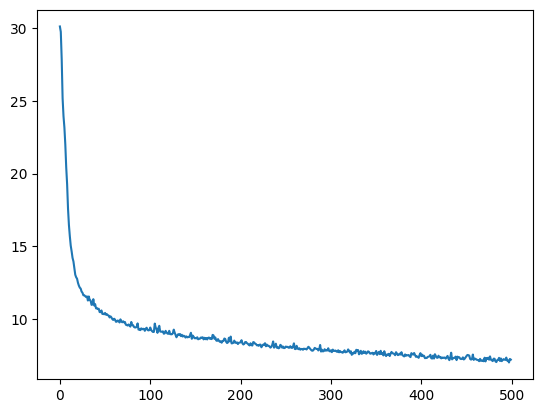

In [7]:
plt.plot(np.arange(len(loss_bin)), loss_bin)

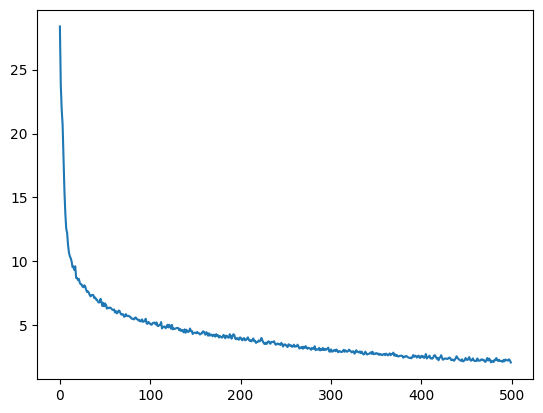

In [8]:
plt.plot(np.arange(len(loss_bin_2)), loss_bin_2)

Text(0, 0.5, 'Target (eV/atom)')

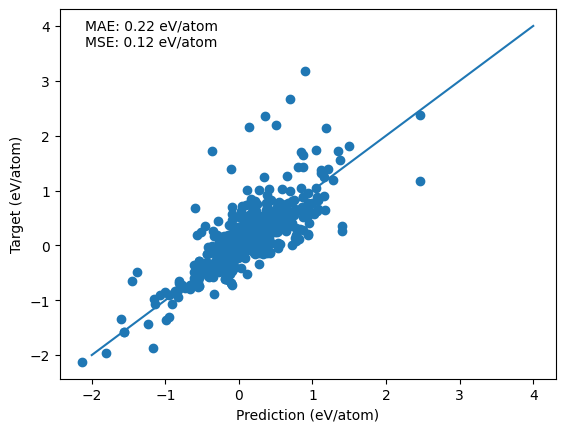

In [9]:
pred_list, targ_list = evaluate(model, "descriptor", test_loader, "cpu")
mse = mean_squared_error(pred_list, targ_list)
mae = mean_absolute_error(pred_list, targ_list)
r2 =  r2_score(pred_list, targ_list)
plt.scatter(pred_list, targ_list)
plt.plot(np.arange(-2,5), np.arange(-2,5))
# Add annotation with the correct position for MAE
plt.annotate(f"MAE: {mae:.2f} eV/atom\nMSE: {mse:.2f} eV/atom", xy=(0.05, 0.9), xycoords='axes fraction')

# plt.annotate(f"MAE: {mae:.2f} eV/atom")
# plt.annotate(f"MAE: {mae:.2f} eV/atom")
plt.xlabel("Prediction (eV/atom)")
plt.ylabel("Target (eV/atom)")

Text(0, 0.5, 'Target (eV/atom)')

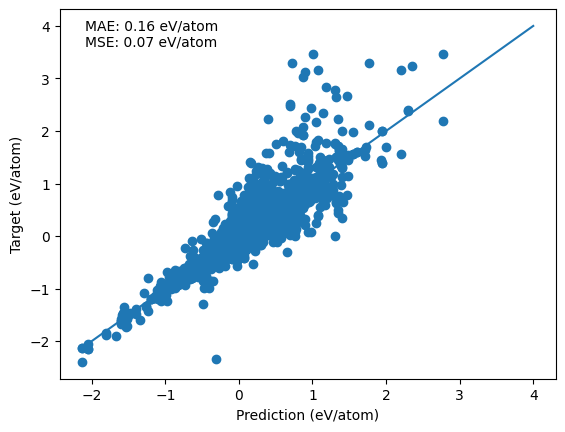

In [10]:
pred_list_train, targ_list_train = evaluate(model, "descriptor", train_loader, "cpu")
mse = mean_squared_error(pred_list_train, targ_list_train)
mae = mean_absolute_error(pred_list_train, targ_list_train)
r2 =  r2_score(pred_list_train, targ_list_train)
plt.scatter(pred_list_train, targ_list_train)
plt.plot(np.arange(-2,5), np.arange(-2,5))
# Add annotation with the correct position for MAE
plt.annotate(f"MAE: {mae:.2f} eV/atom\nMSE: {mse:.2f} eV/atom", xy=(0.05, 0.9), xycoords='axes fraction')

# plt.annotate(f"MAE: {mae:.2f} eV/atom")
# plt.annotate(f"MAE: {mae:.2f} eV/atom")
plt.xlabel("Prediction (eV/atom)")
plt.ylabel("Target (eV/atom)")

Text(0, 0.5, 'Target (eV/atom)')

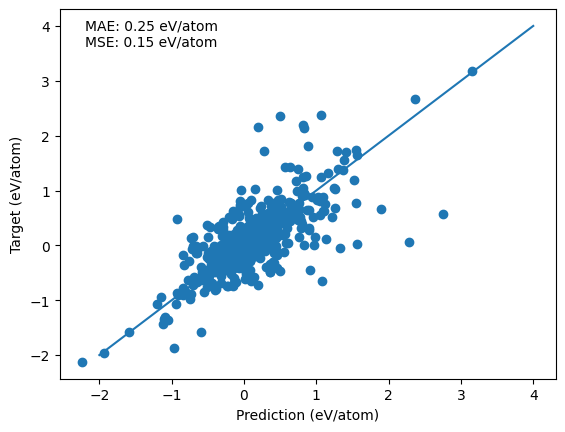

In [11]:
pred_list_2, targ_list_2 = evaluate(model2,"descriptor_2", test_loader, "cpu")
mse_2 = mean_squared_error(pred_list_2, targ_list_2)
mae_2 = mean_absolute_error(pred_list_2, targ_list_2)
r2_2 =  r2_score(pred_list_2, targ_list_2)
plt.scatter(pred_list_2, targ_list_2)
plt.plot(np.arange(-2,5), np.arange(-2,5))
# Add annotation with the correct position for MAE
plt.annotate(f"MAE: {mae_2:.2f} eV/atom\nMSE: {mse_2:.2f} eV/atom", xy=(0.05, 0.9), xycoords='axes fraction')

# plt.annotate(f"MAE: {mae:.2f} eV/atom")
# plt.annotate(f"MAE: {mae:.2f} eV/atom")
plt.xlabel("Prediction (eV/atom)")
plt.ylabel("Target (eV/atom)")

Text(0, 0.5, 'Target (eV/atom)')

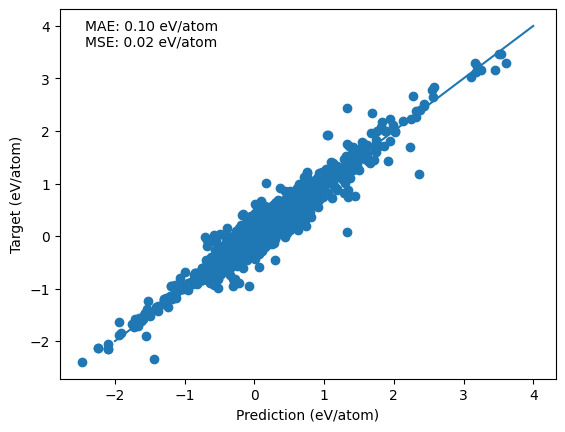

In [12]:
pred_list_2_train, targ_list_2_train = evaluate(model2,"descriptor_2", train_loader, "cpu")
mse_2 = mean_squared_error(pred_list_2_train, targ_list_2_train)
mae_2 = mean_absolute_error(pred_list_2_train, targ_list_2_train)
r2_2 =  r2_score(pred_list_2_train, targ_list_2_train)
plt.scatter(pred_list_2_train, targ_list_2_train)
plt.plot(np.arange(-2,5), np.arange(-2,5))
# Add annotation with the correct position for MAE
plt.annotate(f"MAE: {mae_2:.2f} eV/atom\nMSE: {mse_2:.2f} eV/atom", xy=(0.05, 0.9), xycoords='axes fraction')

# plt.annotate(f"MAE: {mae:.2f} eV/atom")
# plt.annotate(f"MAE: {mae:.2f} eV/atom")
plt.xlabel("Prediction (eV/atom)")
plt.ylabel("Target (eV/atom)")